In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [39]:
file = pd.read_csv('files/GDI.csv')
file = file.replace('..', 0) # fixing missing values

# setting types from 'object' into 'number'
file['GDI_Value'] = pd.to_numeric(file['GDI_Value'], errors='coerce')
file['GDI_Group'] = pd.to_numeric(file['GDI_Group'], errors='coerce')
file['HDI_Male'] = pd.to_numeric(file['HDI_Male'], errors='coerce')
file['Lif_Excep_Male'] = pd.to_numeric(file['Lif_Excep_Male'], errors='coerce')
file['Excep_Yrs_Schooling_Female'] = pd.to_numeric(file['Excep_Yrs_Schooling_Female'], errors='coerce')

# file.dtypes

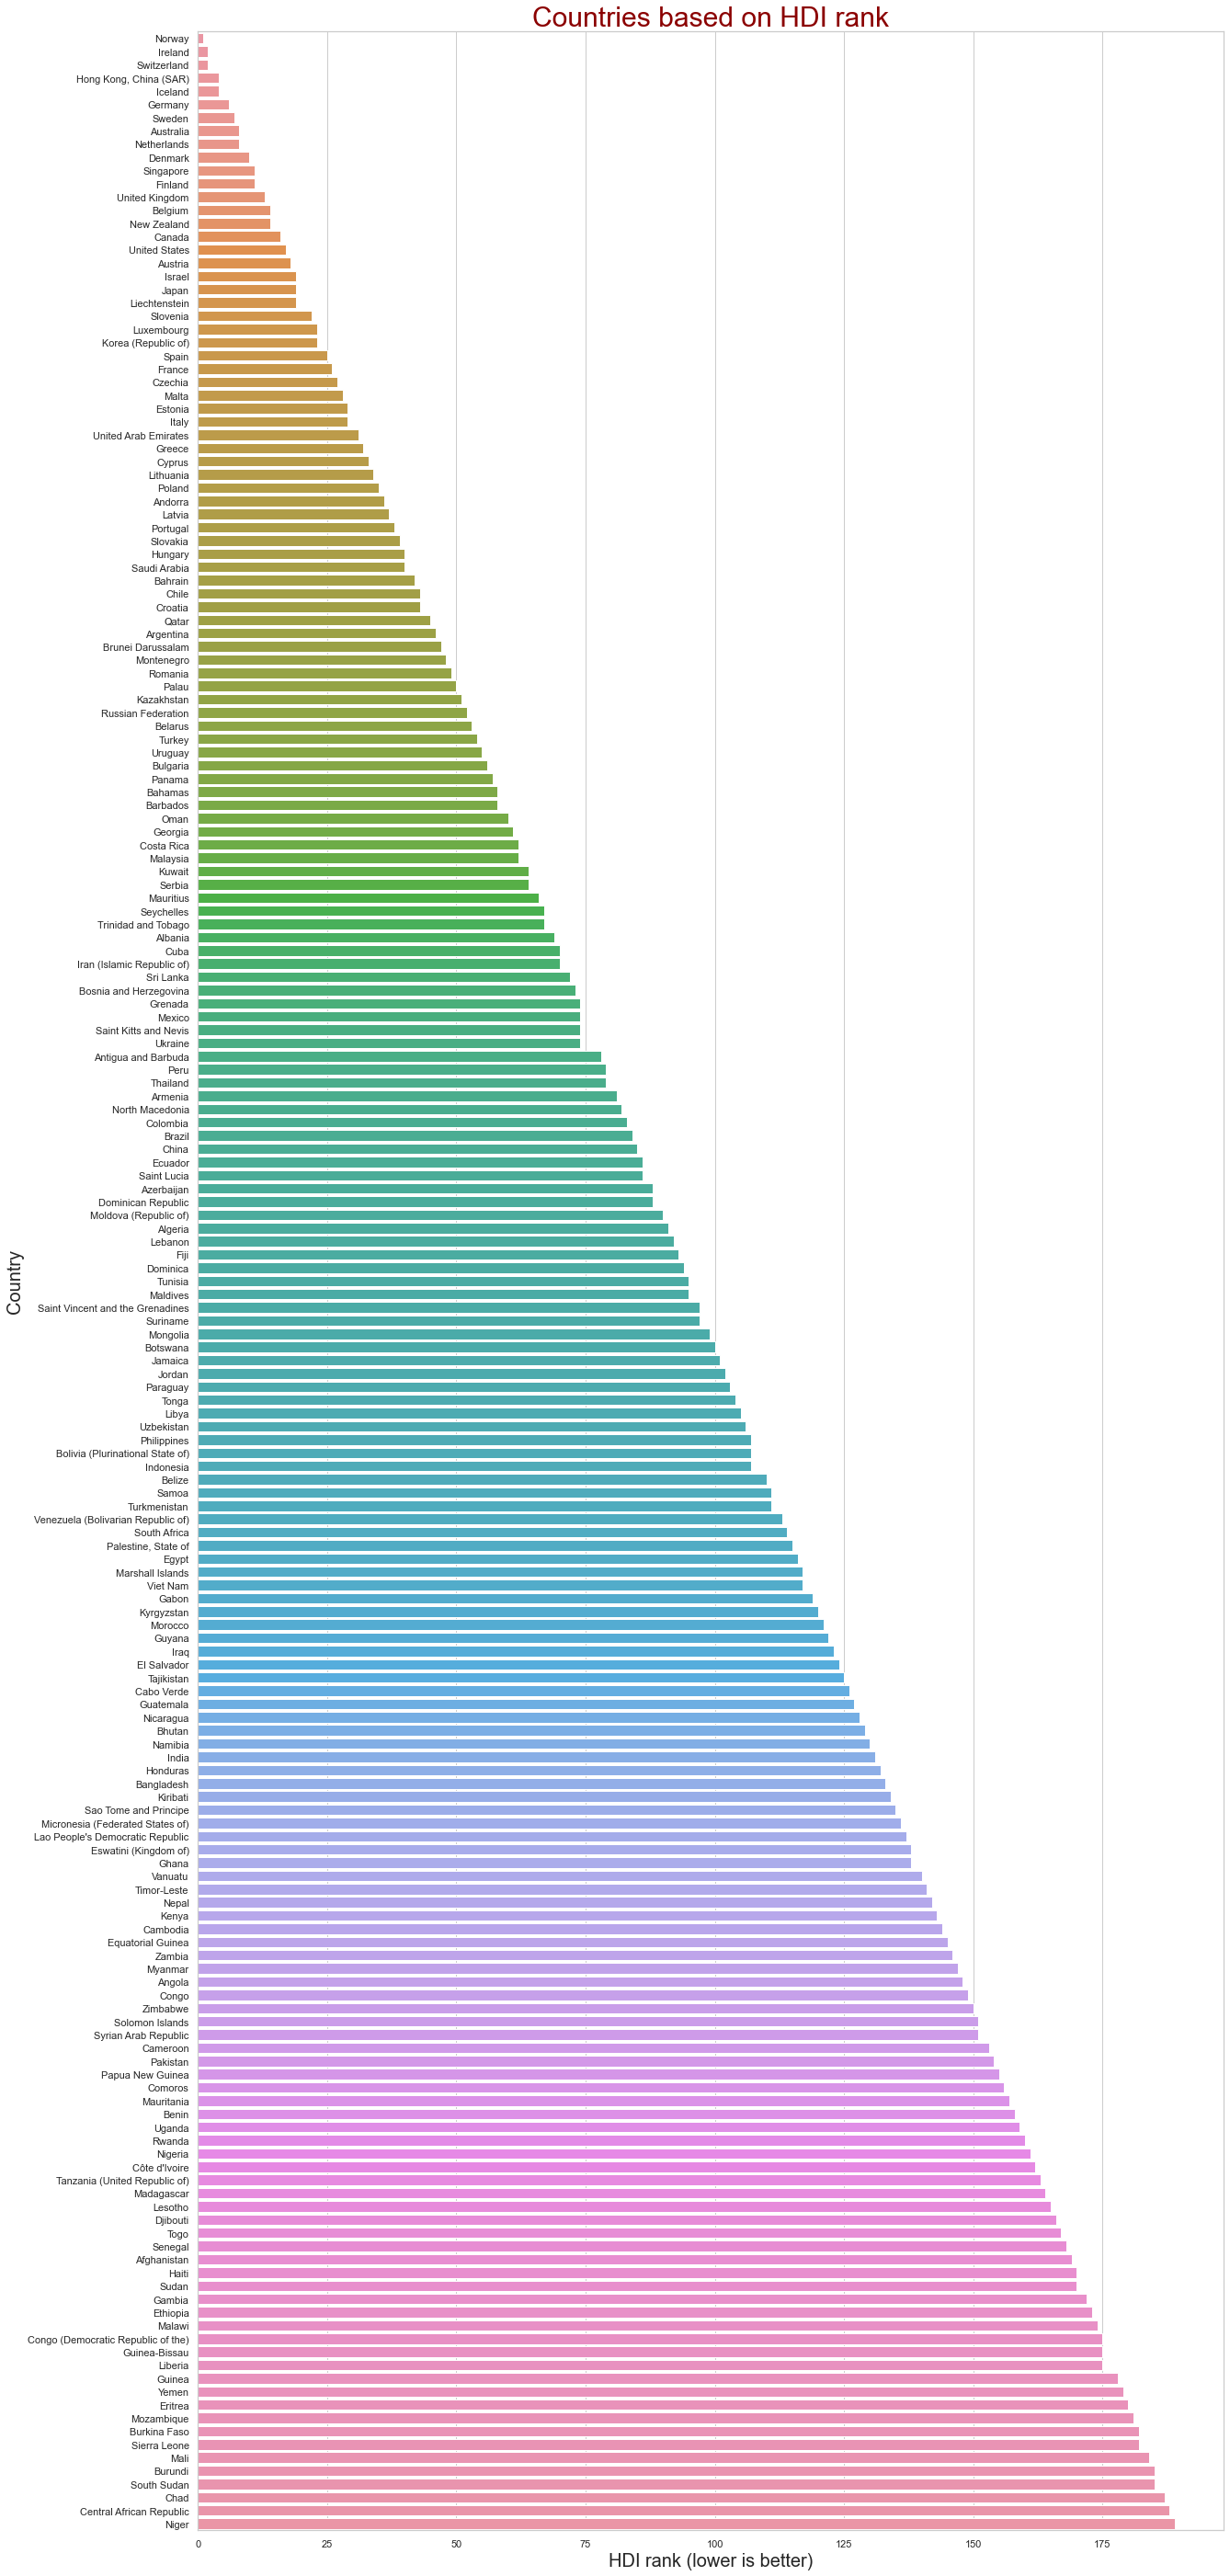

In [40]:
# countries and their HDI (Human Development Index)
hdi = file.sort_values(by='HDI Rank', ascending=True)
plt.figure(figsize=(20,50))
hdi_plot = sns.barplot(x = 'HDI Rank', y = 'Country', data = hdi)
plt.xlabel('HDI rank (lower is better)', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.title('Countries based on HDI rank', fontsize=30, color='darkred');

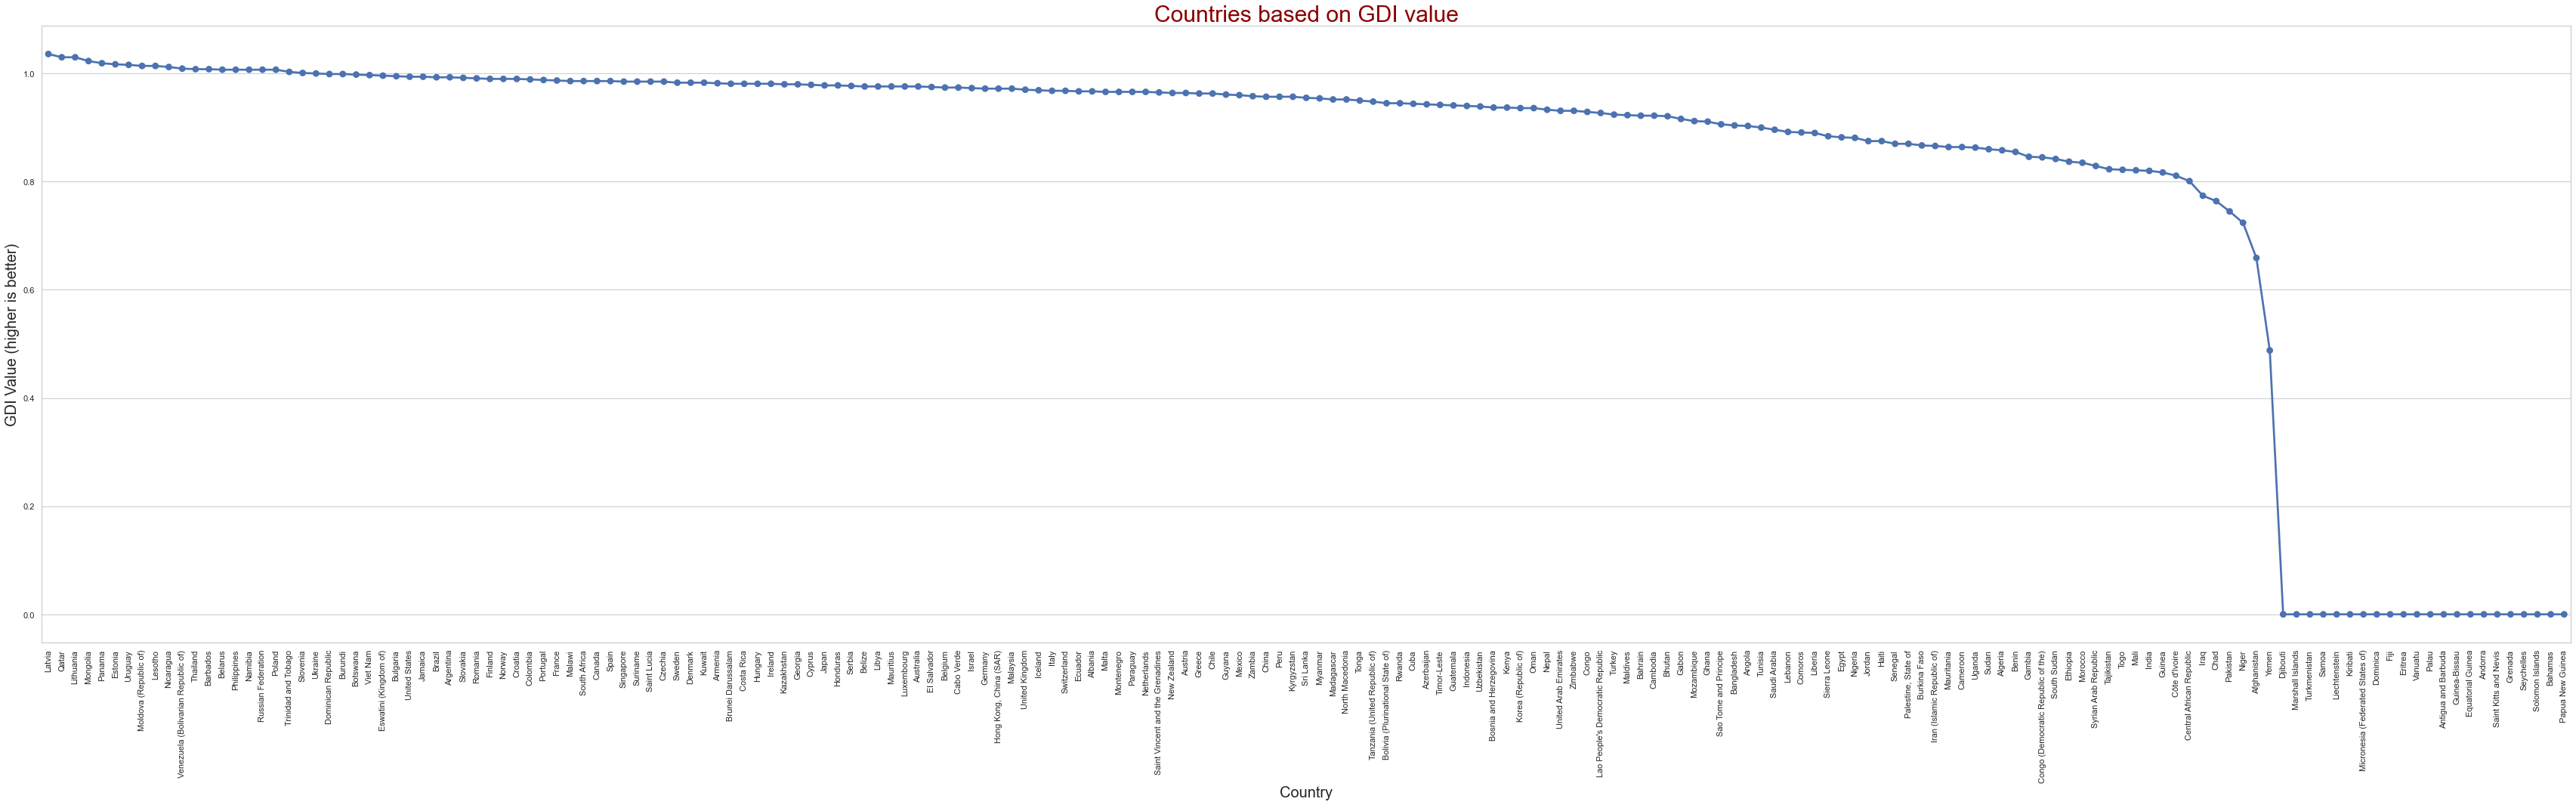

In [41]:
# countries and their GDI (Gender Development Index)
gdi = file.sort_values(by='GDI_Value', ascending=False)
plt.figure(figsize=(60,15))
gdi_plot = sns.pointplot(x = 'Country', y = 'GDI_Value', data = gdi)
plt.xlabel('Country', fontsize=20)
plt.ylabel('GDI Value (higher is better)', fontsize=20)
plt.xticks(rotation = 90)
plt.title('Countries based on GDI value', fontsize=30, color='darkred');

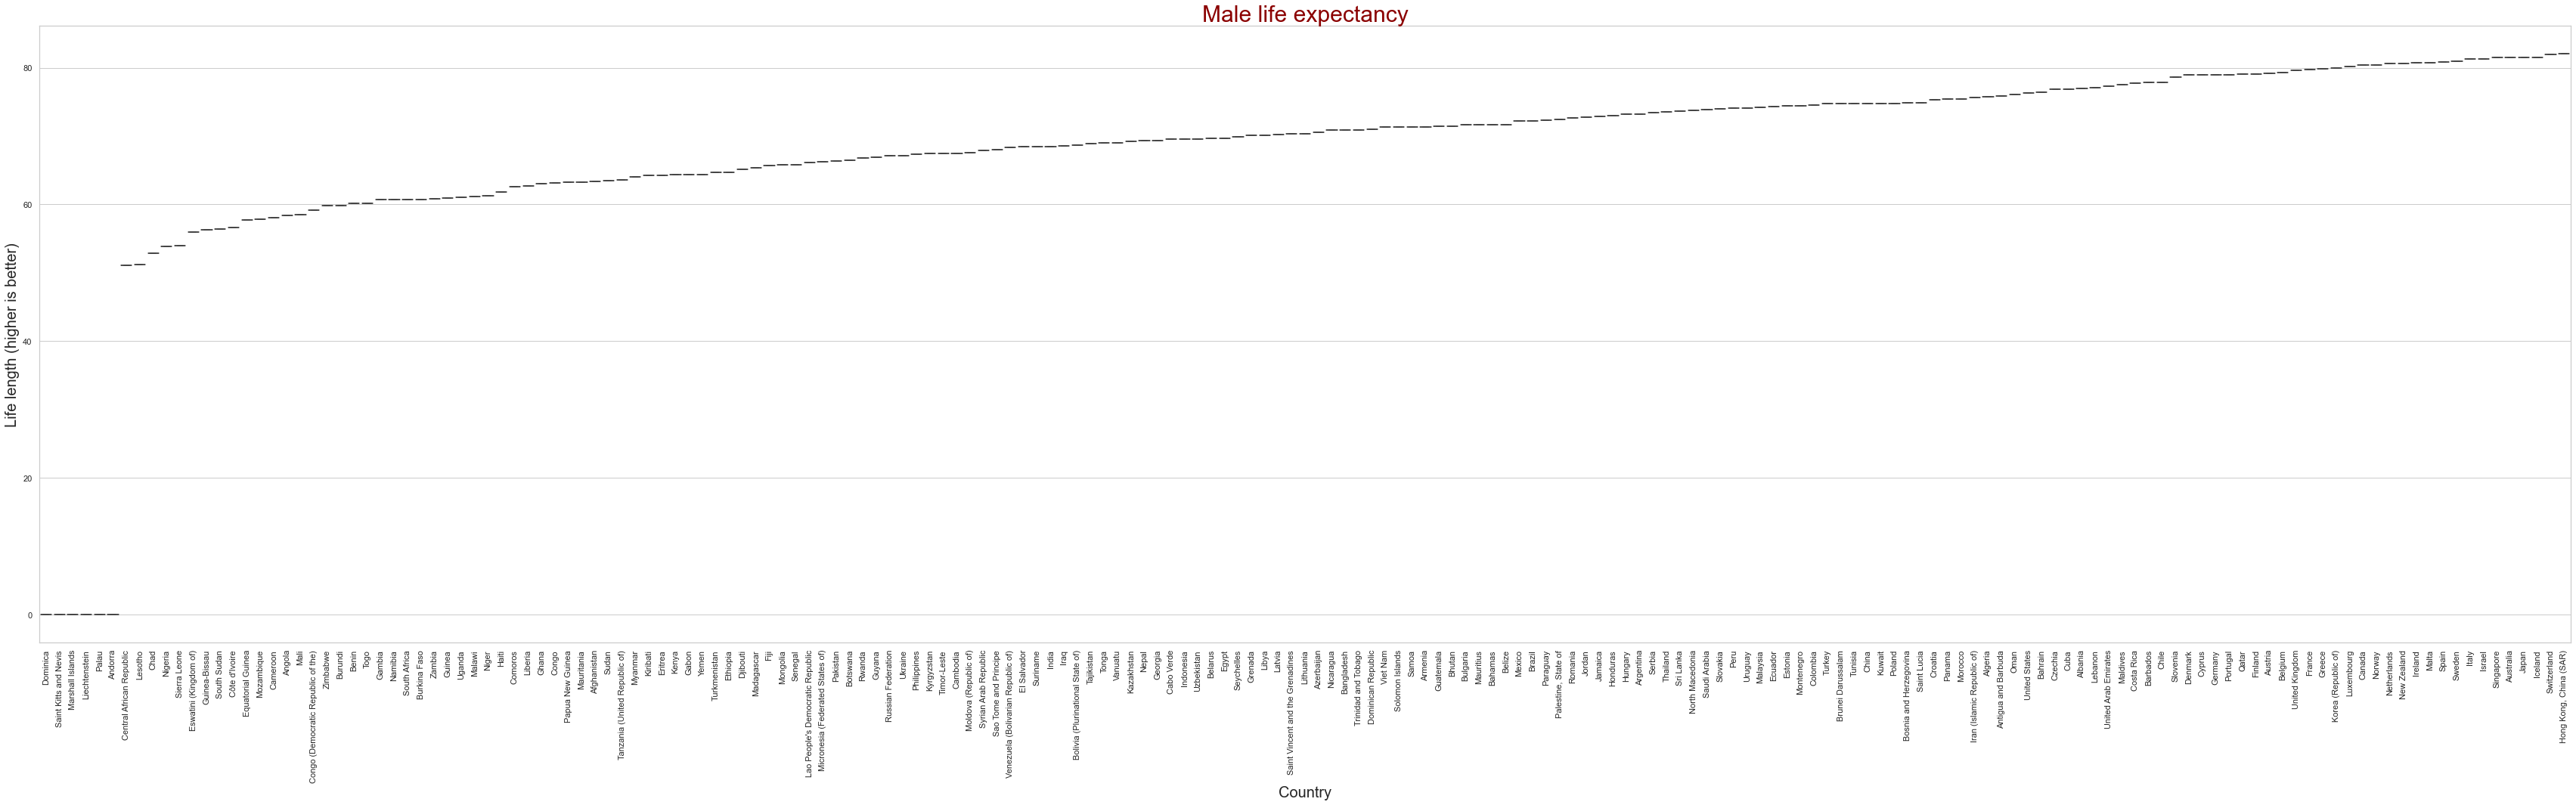

In [42]:
# male life expectancy
male_life = file.sort_values(by='Lif_Excep_Male', ascending=True)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(60,15))
mlife_plot = sns.boxplot(x = 'Country', y = 'Lif_Excep_Male', data = male_life)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Life length (higher is better)', fontsize=20)
plt.xticks(rotation = 90)
plt.title('Male life expectancy', fontsize=30, color='darkred');

# need to look at the picture for better view

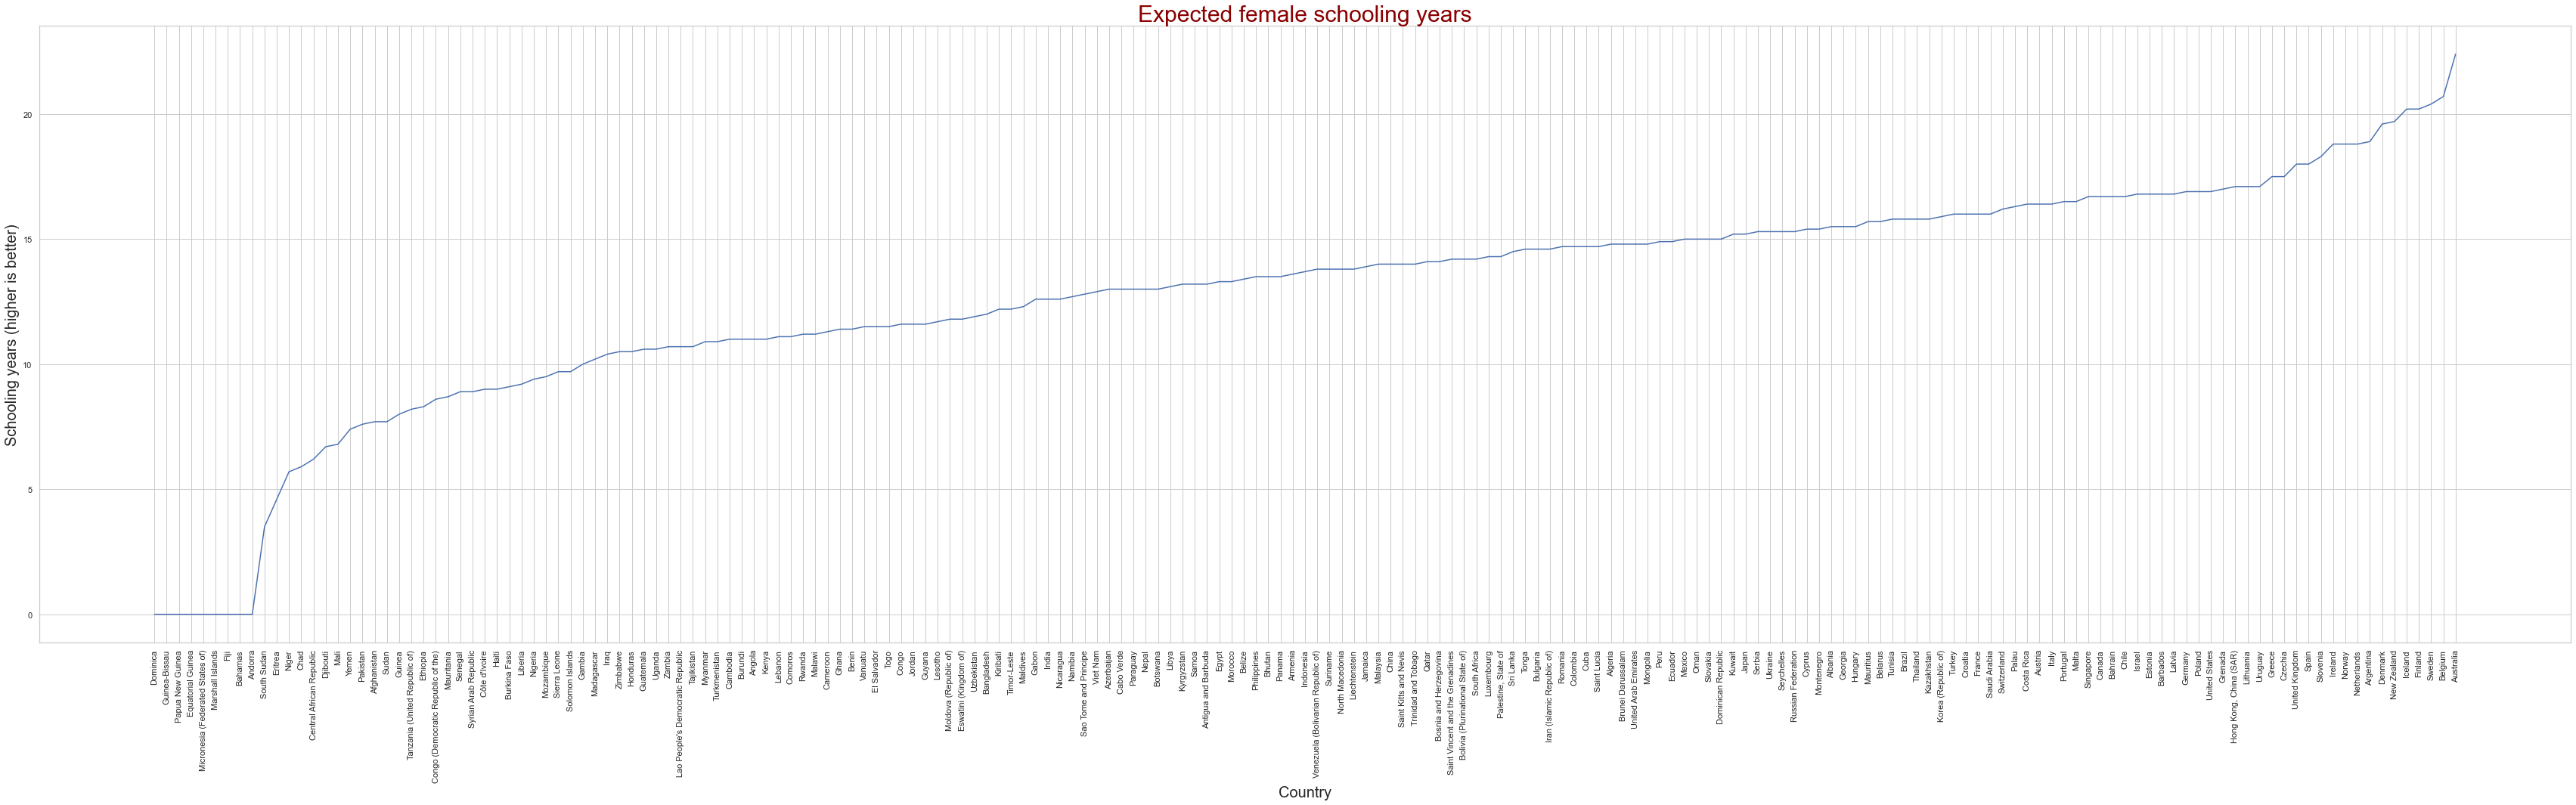

In [43]:
# female schooling years expectancy
female_years = file.sort_values(by='Excep_Yrs_Schooling_Female', ascending=True)
plt.figure(figsize=(60,15))
fyears_plot = sns.lineplot(x = 'Country', y = 'Excep_Yrs_Schooling_Female', data = female_years)
plt.xticks(rotation = 90)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Schooling years (higher is better)', fontsize=20)
plt.title('Expected female schooling years', fontsize=30, color='darkred');

# need to look at the picture for better view

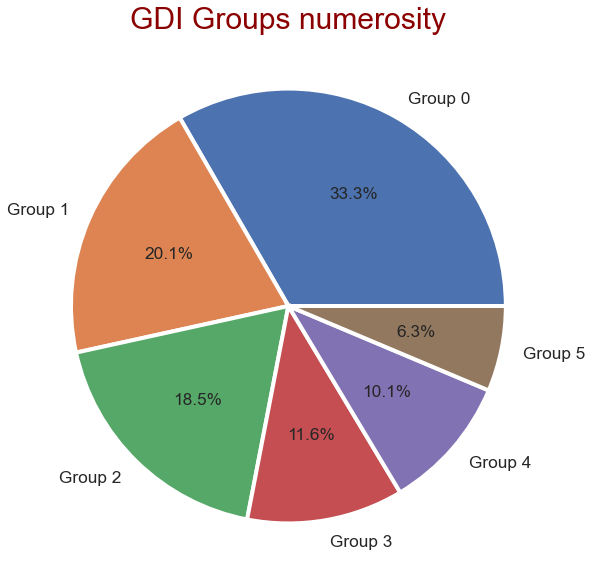

In [44]:
# countries in GDI group (Gender Development Index)
data = file['GDI_Group'][1:].value_counts()
labels = []
[labels.append(f"Group {i}") for i in range(file['GDI_Group'][1:].max()+1)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(data, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 4.0, 'edgecolor': 'white'}, textprops={'size': 'x-large'})

ax.set_title('GDI Groups numerosity', fontsize=30, color='darkred')
plt.show()